
My ML Question: Can we accurately predict the presence or absence of heart disease in patients by utilizing their demographic and health metrics, such as age, sex, cholesterol levels, and more, within the context of this specific problem?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
import os
current_directory = os.getcwd()
os.getcwd()

'/home/codio/workspace'

In [3]:
import os

downloads_directory = '/Users/eman/Downloads'

os.chdir(downloads_directory)


current_directory = os.getcwd()
print("Current working directory:", current_directory)

In [ ]:
import pandas as pd

# Specify the full path to the CSV file in the "/Users/eman/Downloads" directory
Data_Read = '/Users/eman/Downloads/heart.xls'

# Read the CSV file into a DataFrame

df = pd.read_excel(Data_Read)

In [4]:
# Explore first five rows of dataset 

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# print column names of the dataset 
col_names = df.columns
print(col_names)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [6]:
# check missing values 

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:

print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [8]:
# create a set for numerical and categorial variables

Numerical_Select = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR',
                    'Oldpeak']

Categorial_Select = ['Sex','ChestPainType','RestingECG',
                     'ExerciseAngina','ST_Slope','HeartDisease']

Numerical_Var=df[Numerical_Select] 

Categorial_Var = df[Categorial_Select]

print(Numerical_Var)
print(Categorial_Var)                  

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0     40        140          289          0    172      0.0
1     49        160          180          0    156      1.0
2     37        130          283          0     98      0.0
3     48        138          214          0    108      1.5
4     54        150          195          0    122      0.0
..   ...        ...          ...        ...    ...      ...
913   45        110          264          0    132      1.2
914   68        144          193          1    141      3.4
915   57        130          131          0    115      1.2
916   57        130          236          0    174      0.0
917   38        138          175          0    173      0.0

[918 rows x 6 columns]
    Sex ChestPainType RestingECG ExerciseAngina ST_Slope  HeartDisease
0     M           ATA     Normal              N       Up             0
1     F           NAP     Normal              N     Flat             1
2     M           ATA         ST           

In [9]:
# Summary statistics for numeric columns

Numeric_summary = Numerical_Var.describe()

print(Numeric_summary)


              Age   RestingBP  Cholesterol   FastingBS       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564    0.233115  136.809368    0.887364
std      9.432617   18.514154   109.384145    0.423046   25.460334    1.066570
min     28.000000    0.000000     0.000000    0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000    0.000000  120.000000    0.000000
50%     54.000000  130.000000   223.000000    0.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000    0.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000    1.000000  202.000000    6.200000


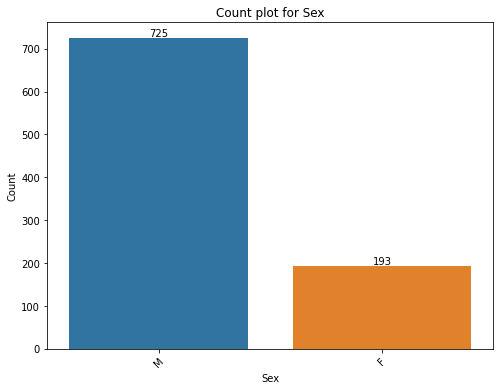

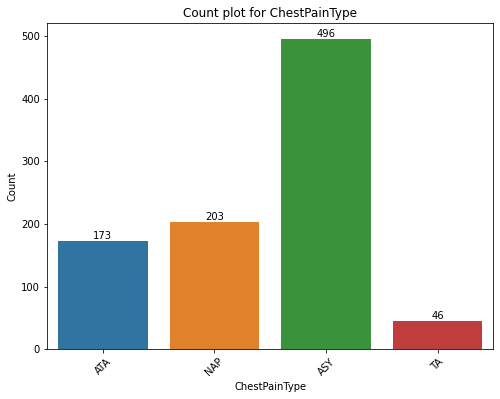

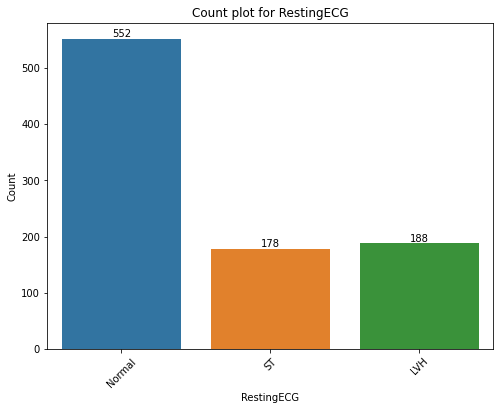

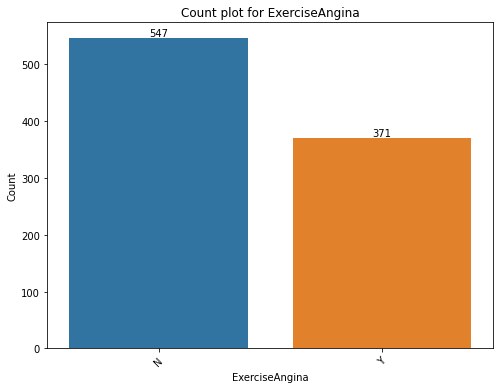

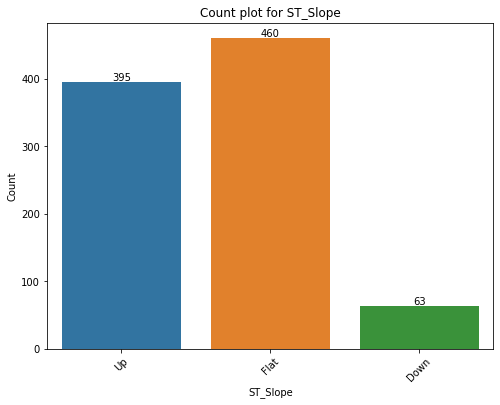

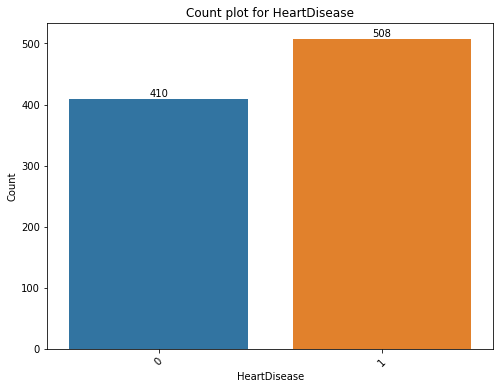

In [10]:
# Count plots for categorical attributes

Categorical_Select = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for i in Categorical_Select:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=i)
    plt.title(f'Count plot for {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    total_count = len(df)
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

    plt.show()


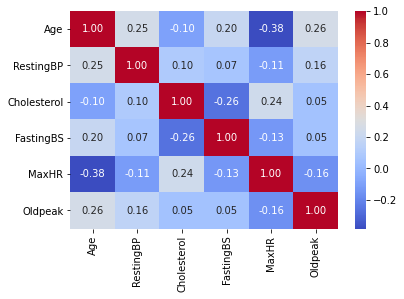

              Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
Age          1.00       0.25        -0.10       0.20  -0.38     0.26
RestingBP    0.25       1.00         0.10       0.07  -0.11     0.16
Cholesterol -0.10       0.10         1.00      -0.26   0.24     0.05
FastingBS    0.20       0.07        -0.26       1.00  -0.13     0.05
MaxHR       -0.38      -0.11         0.24      -0.13   1.00    -0.16
Oldpeak      0.26       0.16         0.05       0.05  -0.16     1.00


In [11]:
# Correlation matrix
correlation_matrix = Numerical_Var.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.show()
print(correlation_matrix.round(2))

In [12]:
# print unique value in categorial varaible - Transform to numeric

for i in Categorial_Select :
    unique_values = df[i].unique()
    print(f"unique values in column'{i}': {unique_values}")

unique values in column'Sex': ['M' 'F']
unique values in column'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
unique values in column'RestingECG': ['Normal' 'ST' 'LVH']
unique values in column'ExerciseAngina': ['N' 'Y']
unique values in column'ST_Slope': ['Up' 'Flat' 'Down']
unique values in column'HeartDisease': [0 1]


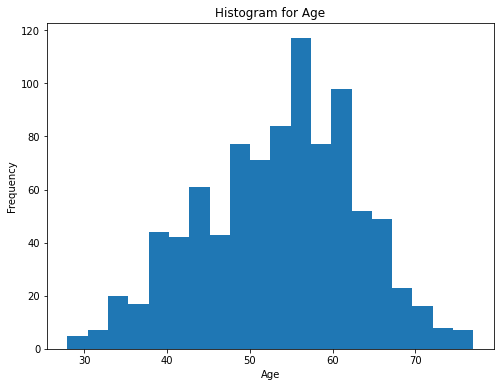

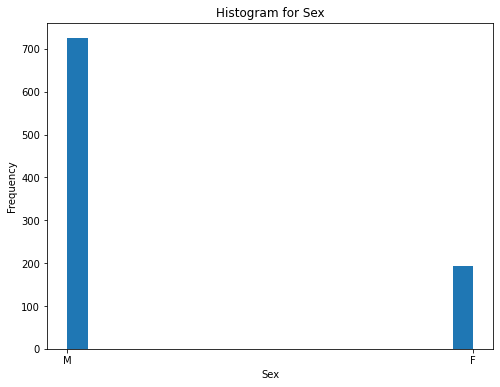

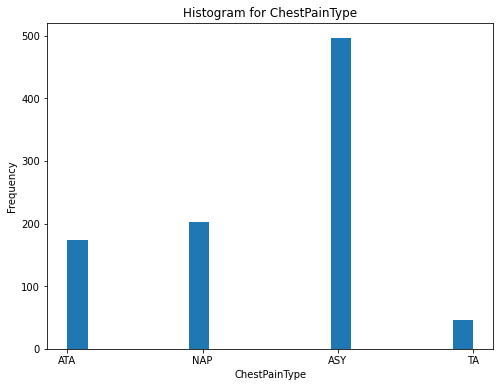

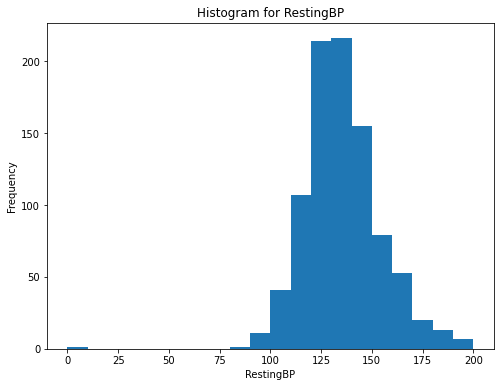

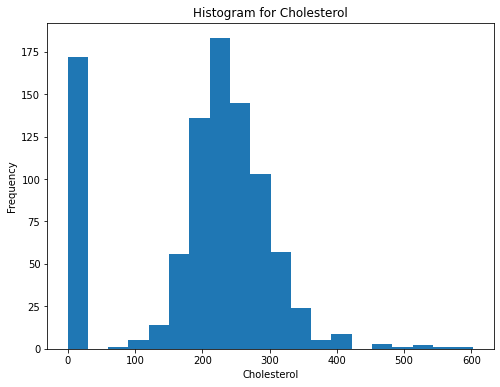

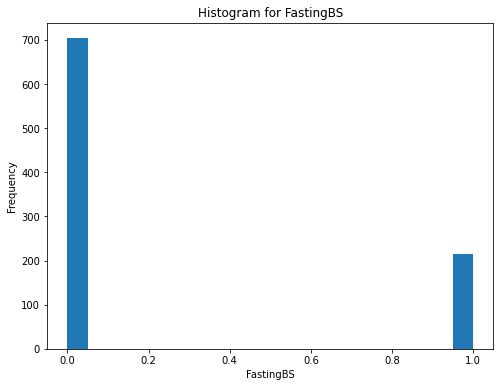

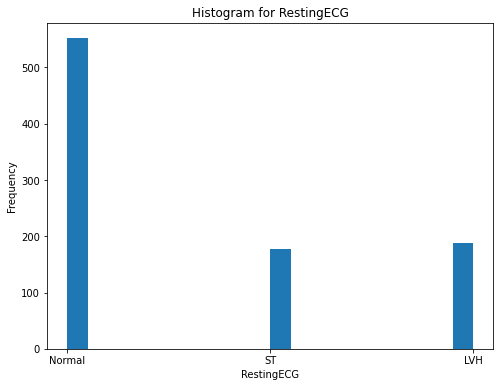

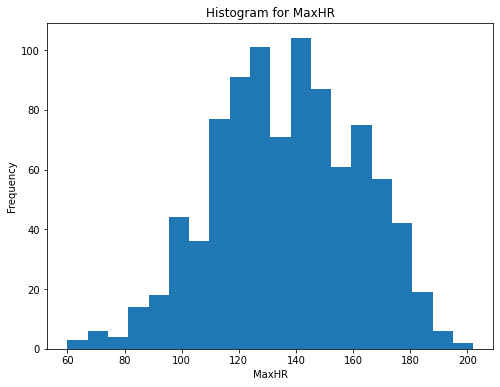

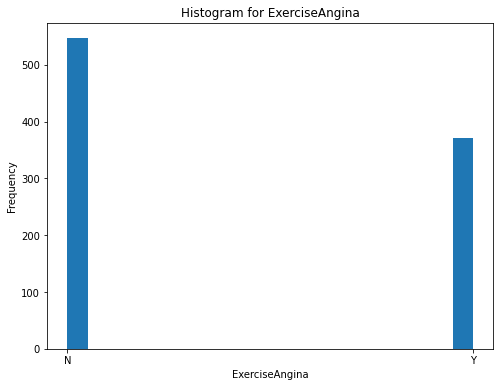

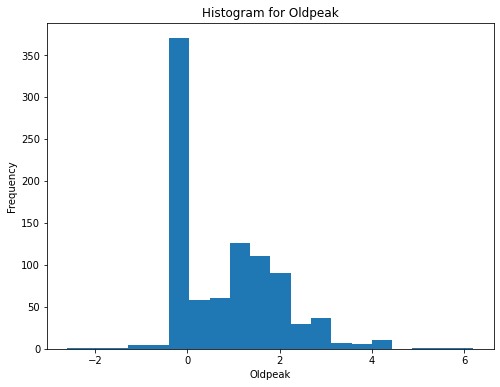

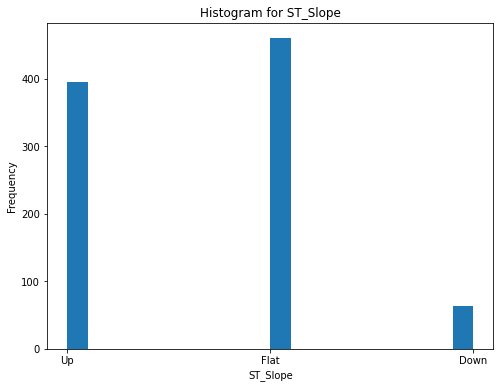

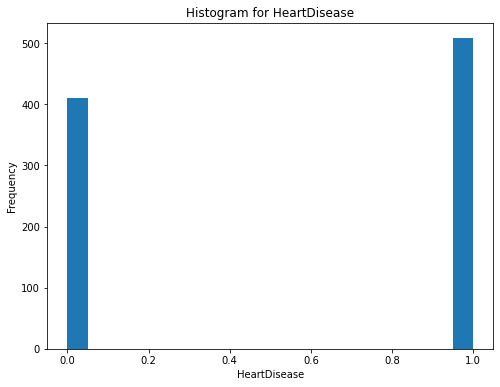

In [13]:
# create loop to plot histogram to each feature in the df 

for i in df.columns:
    plt.figure(figsize=(8,6))
    plt.hist(df[i],bins =20)
    plt.title(f'Histogram for {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


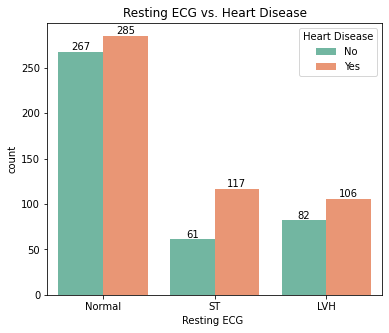

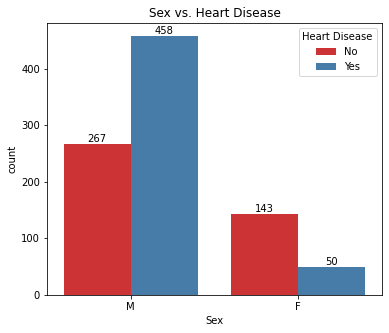

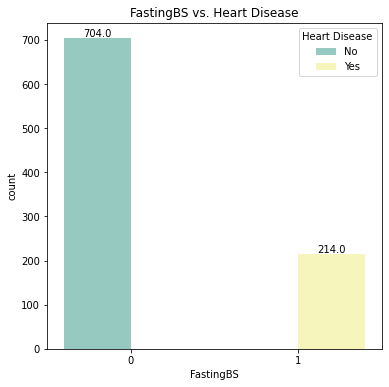

In [14]:
# create plots to show relations between Target feature and some of other features 

plt.figure(figsize=(6, 5))
ax = sns.countplot(data= df, x='RestingECG', hue='HeartDisease', palette='Set2')
plt.title('Resting ECG vs. Heart Disease')
plt.xlabel('Resting ECG ')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()


plt.figure(figsize=(6, 5))
ax = sns.countplot(data= df, x='Sex', hue='HeartDisease', palette='Set1')
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()


plt.figure(figsize=(6, 6))
ax = sns.countplot(data= df, x='FastingBS', hue='FastingBS', palette='Set3')
plt.title('FastingBS vs. Heart Disease')
plt.xlabel('FastingBS')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()

In [15]:
# Clustering 

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select relevant features for clustering 
Numerical_Select  = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorial_Select = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


# Encode categorical features (one-hot encoding)
df_encoded = pd.get_dummies(df,columns = Categorial_Select , drop_first = True)

# Scale numerical features
scaler = StandardScaler()
df_encoded[Numerical_Select] = scaler.fit_transform(df_encoded[Numerical_Select])

# Choose the number of clusters (K) 
k = 3

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded[Numerical_Select])

# # Analyze the characteristics of each cluster
cluster_centers = kmeans.cluster_centers_  
cluster_df = pd.DataFrame(cluster_centers, columns=Numerical_Select)
cluster_df['Cluster'] = range(1, k+1)  

# Display the cluster characteristics (centroid values)
print(cluster_df)


        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Cluster
0  0.544736   0.300318    -0.026244  -0.551341 -0.562161  0.450992        1
1 -0.740874  -0.366191     0.313493  -0.538238  0.686447 -0.487598        2
2  0.375103   0.134835    -0.491116   1.813758 -0.254064  0.096371        3


In [16]:
# adding cluster lables to actual data
df['Cluster'] = df_encoded['Cluster'] 

# Group the data by the 'Cluster' column

cluster_groups = df.groupby('Cluster')

# Iterate through the groups and display characteristics of each cluster
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    min_max = group[Numerical_Select].agg(['min', 'max'])
    print(min_max)

Cluster 0:
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
min   39         96            0          0     60     -1.0
max   77        200          409          0    180      6.2
Cluster 1:
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
min   28          0            0          0     80     -1.1
max   67        192          564          1    202      3.8
Cluster 2:
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
min   32         95            0          1     67     -2.6
max   75        200          603          1    184      4.0


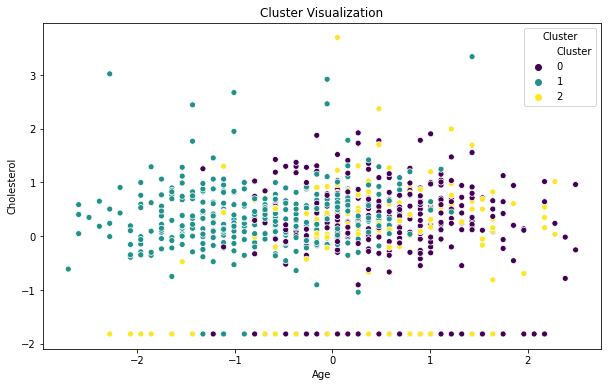

In [17]:
# Create a scatter plot to visualize clusters based on two features such Age and Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='Age', y='Cholesterol', hue='Cluster', palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

# Create a ColumnTransformer to apply transformations to the appropriate columns

Numerical_Select = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR',
                    'Oldpeak']

Categorial_Select = ['Sex','ChestPainType','RestingECG',
                     'ExerciseAngina','ST_Slope'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', OrdinalEncoder(),Categorial_Select),
        ('scaler', StandardScaler(), Numerical_Select)
    ])

# Create pipelines for Random Forest Classifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
  
    
# Create pipelines for Logistic Regression
   
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


# Create a pipeline for the GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42)) 
])

# Create a pipeline for the DecisionTreeClassifier
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  
])
        
# Split the data into X (features) and y (target)
        
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
        
        
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Fit and evaluate the Random Forest model
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Classifier Accuracy: {rf_accuracy}')

# Fit and evaluate the Logistic Regression model
lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

# Fit and evaluate the DecisionTreeClassifier model
dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'DecisionTreeClassifier Accuracy: {dt_accuracy}')

# Fit and evaluate the GradientBoostingClassifier

gb_pipeline.fit(X_train, y_train)
gb_predictions = gb_pipeline.predict(X_test)   
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'GradientBoostingClassifier Accuracy: {gb_accuracy}')


Random Forest Classifier Accuracy: 0.8782608695652174
Logistic Regression Accuracy: 0.8608695652173913
DecisionTreeClassifier Accuracy: 0.7913043478260869
GradientBoostingClassifier Accuracy: 0.8608695652173913


In [19]:
# create dataframe to show the accuracy of all models 
   
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
accuracies = [rf_accuracy, lr_accuracy, dt_accuracy, gb_accuracy]  
accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
print(accuracy_df)

                 Model  Accuracy
0        Random Forest  0.878261
1  Logistic Regression  0.860870
2        Decision Tree  0.791304
3    Gradient Boosting  0.860870


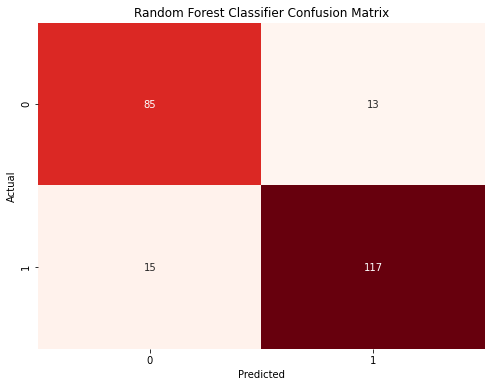

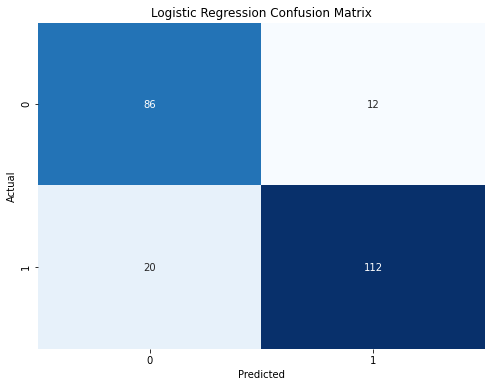

In [20]:
# Calculate confusion matrices for Random Forset & Logistic regression models

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_confusion = confusion_matrix(y_test, rf_predictions)
lr_confusion = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# Hyperparamter models to choose the best model

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a ColumnTransformer to apply transformations to the appropriate columns

Numerical_Select = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Categorial_Select = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', OrdinalEncoder(), Categorial_Select),
        ('scaler', StandardScaler(), Numerical_Select)
    ])

# Split the data into X (features) and y (target)
        
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit and evaluate the DecisionTreeClassifier model
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define hyperparameters for Decision Tree
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV for Decision Tree
dt_grid_search.fit(X_train, y_train)

# Get the best Decision Tree model from GridSearchCV
best_dt_model = dt_grid_search.best_estimator_

# Fit and evaluate the GradientBoostingClassifier
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define hyperparameters for Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV for Gradient Boosting
gb_grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model from GridSearchCV
best_gb_model = gb_grid_search.best_estimator_

# Fit and evaluate the Logistic Regression model with hyperparameter tuning
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define hyperparameters for Logistic Regression
lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],  
    'classifier__penalty': ['l1', 'l2']  
}

# Create a GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV for Logistic Regression
lr_grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model from GridSearchCV
best_lr_model = lr_grid_search.best_estimator_


# Create pipelines for Random Forest Classifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV for Random Forest
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model from GridSearchCV
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best models
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print(f'Best Random Forest Classifier Accuracy: {best_rf_accuracy}')

best_dt_predictions = best_dt_model.predict(X_test)
best_dt_accuracy = accuracy_score(y_test, best_dt_predictions)
print(f'Best DecisionTreeClassifier Accuracy: {best_dt_accuracy}') 

best_gb_predictions = best_gb_model.predict(X_test)
best_gb_accuracy = accuracy_score(y_test, best_gb_predictions)
print(f'Best GradientBoostingClassifier Accuracy: {best_gb_accuracy}')

best_lr_predictions = best_lr_model.predict(X_test)
best_lr_accuracy = accuracy_score(y_test, best_lr_predictions)
print(f'Best Logistic Regression Accuracy: {best_lr_accuracy}')


Best Random Forest Classifier Accuracy: 0.8858695652173914
Best DecisionTreeClassifier Accuracy: 0.7989130434782609
Best GradientBoostingClassifier Accuracy: 0.875
Best Logistic Regression Accuracy: 0.842391304347826


In [22]:

# create dataframe to show  accuracy of all models 
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Gradient Boosting']
accuracies = [best_rf_accuracy, best_lr_accuracy, best_dt_accuracy, best_gb_accuracy]  
accuracy_df_best = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
print(accuracy_df_best)


                 Model  Accuracy
0        Random Forest  0.885870
1  Logistic Regression  0.842391
2        Decision Tree  0.798913
3    Gradient Boosting  0.875000


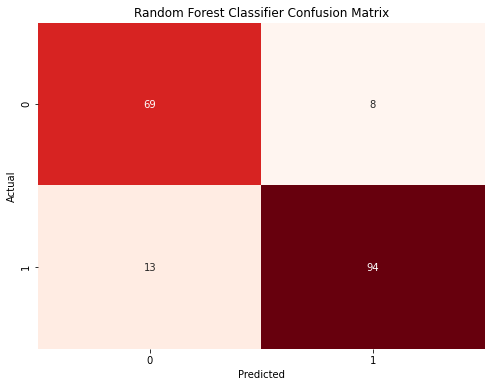

In [23]:
# Calculate confusion matrices for the highest performing model Random Forset

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_confusion = confusion_matrix(y_test, best_rf_predictions)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


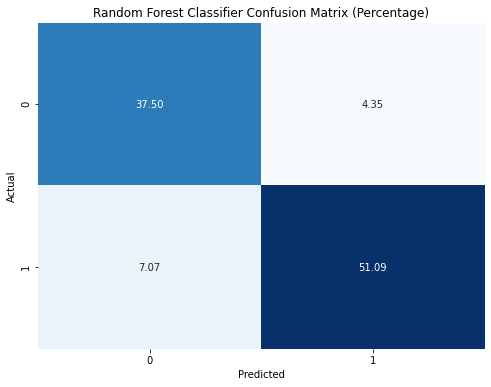

In [24]:
# Calculate confusion matrices with % 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_confusion = confusion_matrix(y_test, best_rf_predictions)

# Calculate percentage values for the confusion matrix
total_samples = len(y_test)
rf_confusion_percent = (rf_confusion / total_samples) * 100

# Plot confusion matrix for Random Forest Classifier with percentage values
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_percent, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Random Forest Classifier Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
